In [1]:
!pip install kaggle


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 /content/kaggle.json



In [6]:
!kaggle datasets download -d moltean/fruits



Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0
100% 964M/964M [00:31<00:00, 31.1MB/s]
100% 964M/964M [00:31<00:00, 32.2MB/s]


In [7]:



!unzip fruits.zip


Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r0_96.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r0_98.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_0.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_10.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_100.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_102.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_104.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-original-size/Training/apple_red_yellow_1/r1_106.jpg  
  inflating: fruits-360_dataset_original-size/fruits-360-o

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the dataset
dataset_path = '/content/fruits-360_dataset_100x100/fruits-360'
train_dir = os.path.join(dataset_path, 'Training')
test_dir = os.path.join(dataset_path, 'Test')

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(100, 100),
    batch_size=32,
    label_mode='int'
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(100, 100),
    batch_size=32,
    label_mode='int'
)

# Normalize the images
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))


Found 70491 files belonging to 141 classes.
Found 23619 files belonging to 141 classes.


AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'

In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the dataset
dataset_path = '/content/fruits-360_dataset_100x100/fruits-360'
train_dir = os.path.join(dataset_path, 'Training')
test_dir = os.path.join(dataset_path, 'Test')

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(100, 100),
    batch_size=32,
    label_mode='int'
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(100, 100),
    batch_size=32,
    label_mode='int'
)

# Normalize the images
# Removed 'experimental' as Rescaling is now directly under tf.keras.layers.preprocessing
normalization_layer = layers.preprocessing.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

Found 70491 files belonging to 141 classes.
Found 23619 files belonging to 141 classes.


AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'preprocessing'

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the dataset
dataset_path = '/content/fruits-360_dataset_100x100/fruits-360'
train_dir = os.path.join(dataset_path, 'Training')
test_dir = os.path.join(dataset_path, 'Test')

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(100, 100),
    batch_size=32,
    label_mode='int'
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(100, 100),
    batch_size=32,
    label_mode='int'
)



Found 70491 files belonging to 141 classes.
Found 23619 files belonging to 141 classes.


In [22]:
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(141, activation='softmax')  # 141 classes as per your dataset
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 141)                 │          72,333 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,362,253 (5.20 MB)

 Trainable params: 1,362,253 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Train the model
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset)


Epoch 1/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.6171 - loss: 1.7798 - val_accuracy: 0.9158 - val_loss: 0.3343
Epoch 2/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - accuracy: 0.9521 - loss: 0.1612 - val_accuracy: 0.9458 - val_loss: 0.2340
Epoch 3/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.9603 - loss: 0.1395 - val_accuracy: 0.9394 - val_loss: 0.3006
Epoch 4/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9670 - loss: 0.1240 - val_accuracy: 0.9197 - val_loss: 0.5430
Epoch 5/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - accuracy: 0.9694 - loss: 0.1328 - val_accuracy: 0.9193 - val_loss: 0.5548
Epoch 6/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9787 - loss: 0.0930 - val_accuracy: 0.9550 - val_loss: 0.3029
Epoch 7/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.9742 - loss: 0.1317 - val_accuracy: 0.9630 - val_loss: 0.2964
Epoch 8/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9781 -

In [24]:
# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 141)                 │          72,333 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,086,761 (15.59 MB)

 Trainable params: 1,362,253 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,724,508 (10.39 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


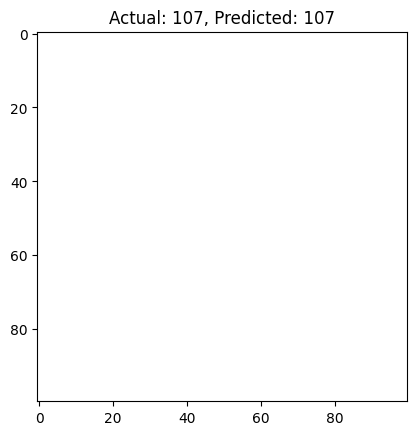

In [25]:
# Select an image from the test set
for images, labels in test_dataset.take(1):
    test_image = images[0].numpy()
    test_label = labels[0].numpy()

# Predict the class of the image
predicted_label = np.argmax(model.predict(test_image.reshape(1, 100, 100, 3)))

# Display the image and prediction
import matplotlib.pyplot as plt
plt.imshow(test_image)
plt.title(f'Actual: {test_label}, Predicted: {predicted_label}')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
Visualizing layer 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


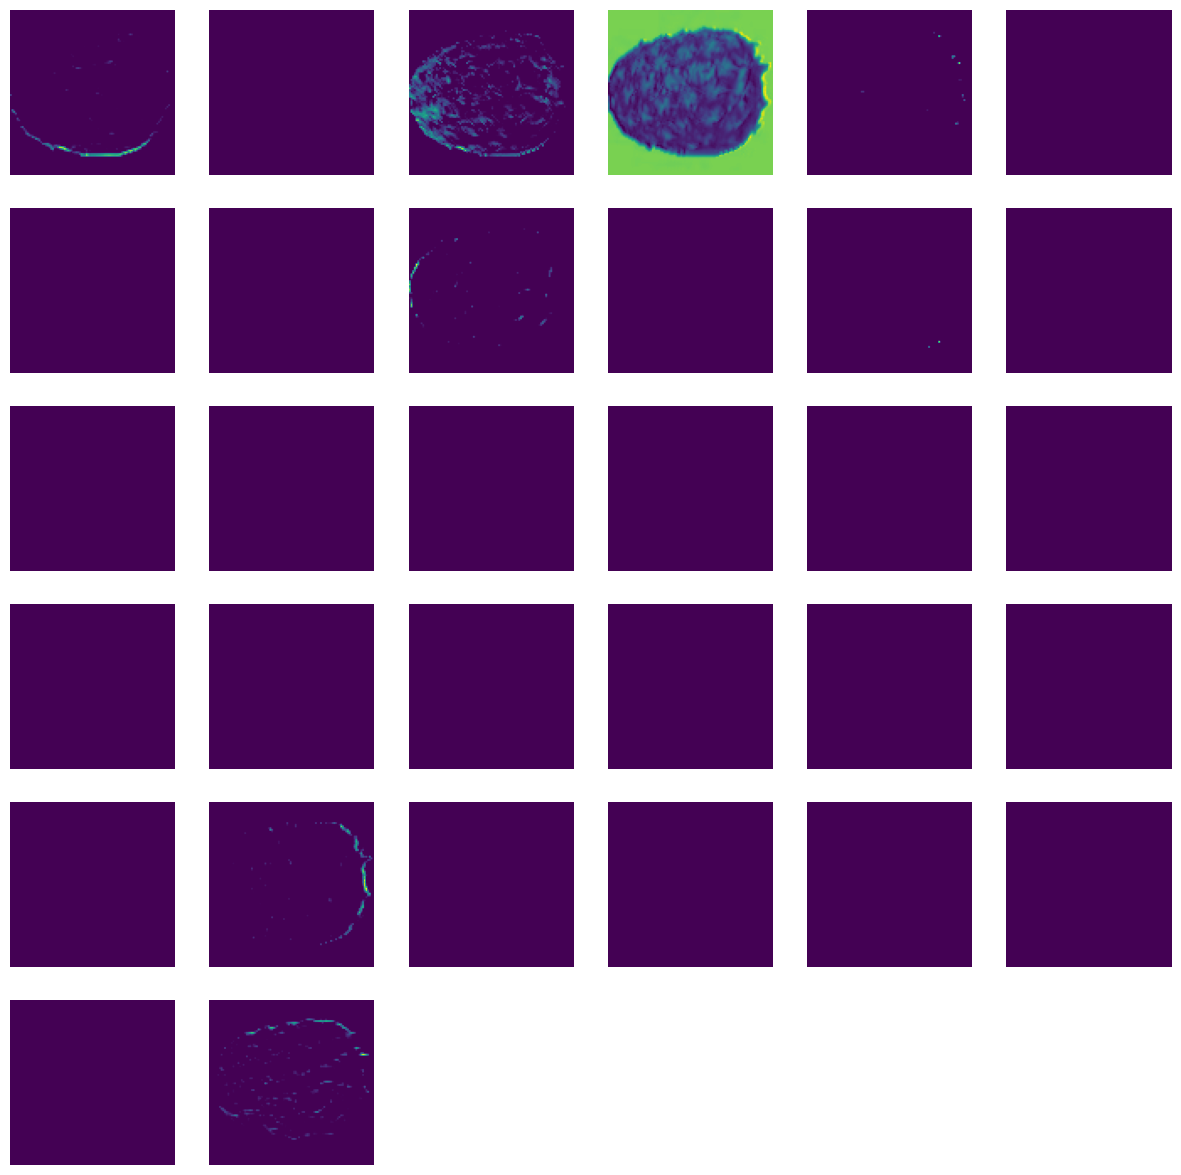

Visualizing layer 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


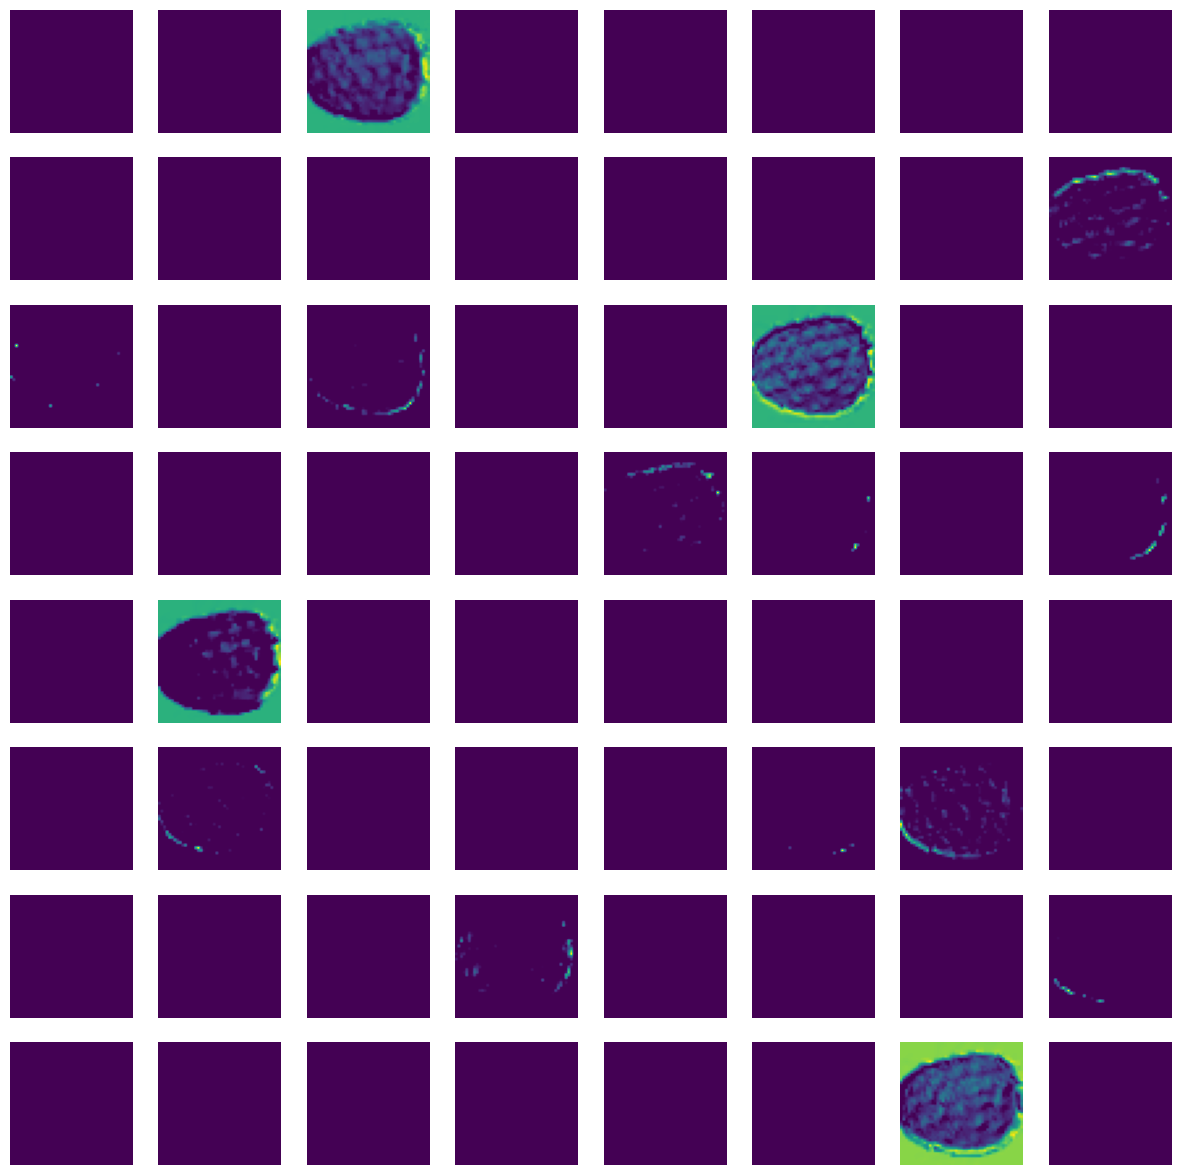

Visualizing layer 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


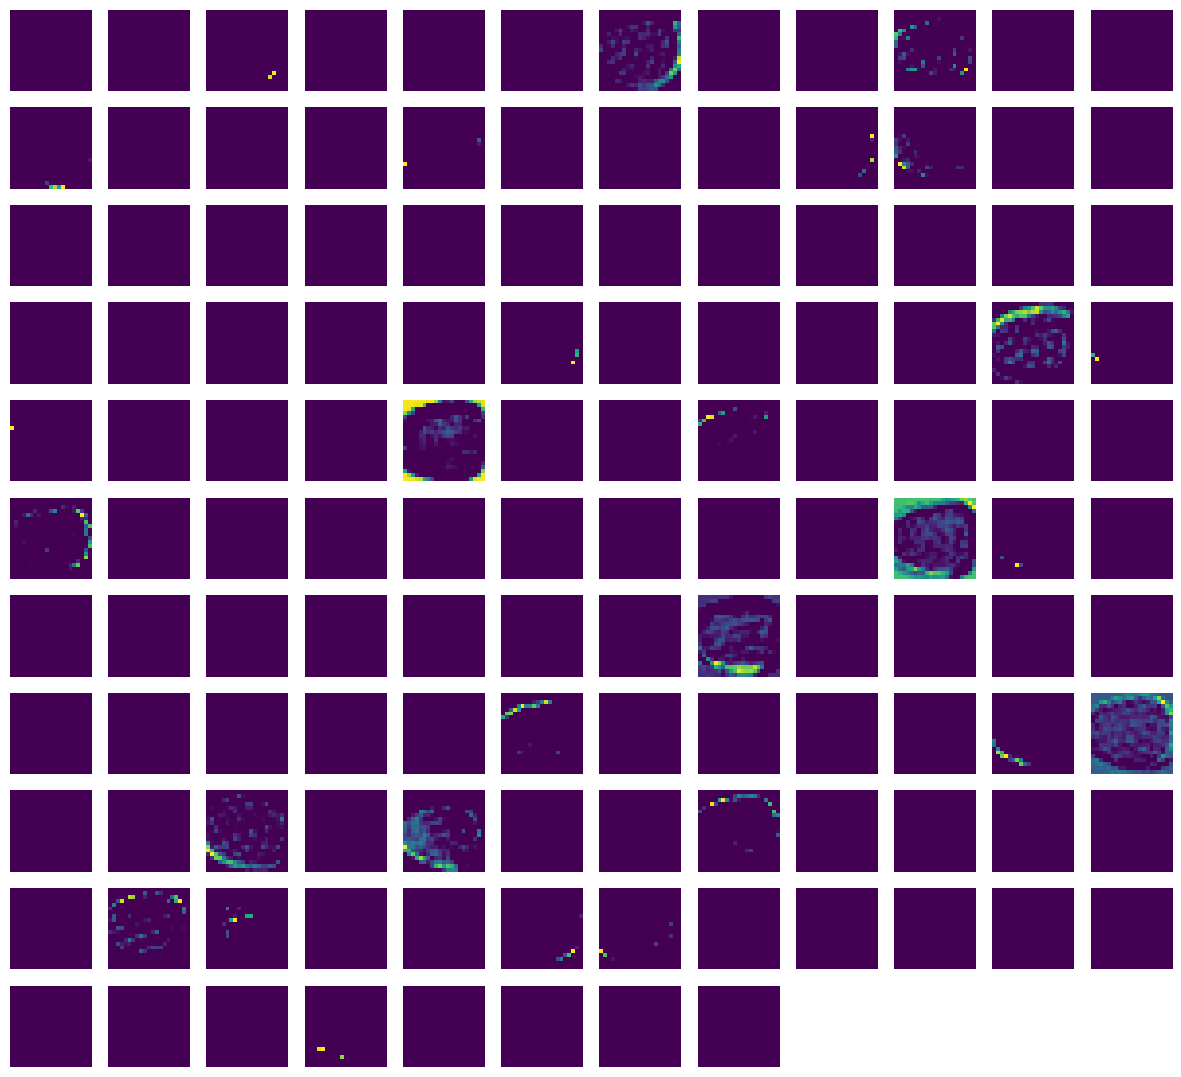

Visualizing layer 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


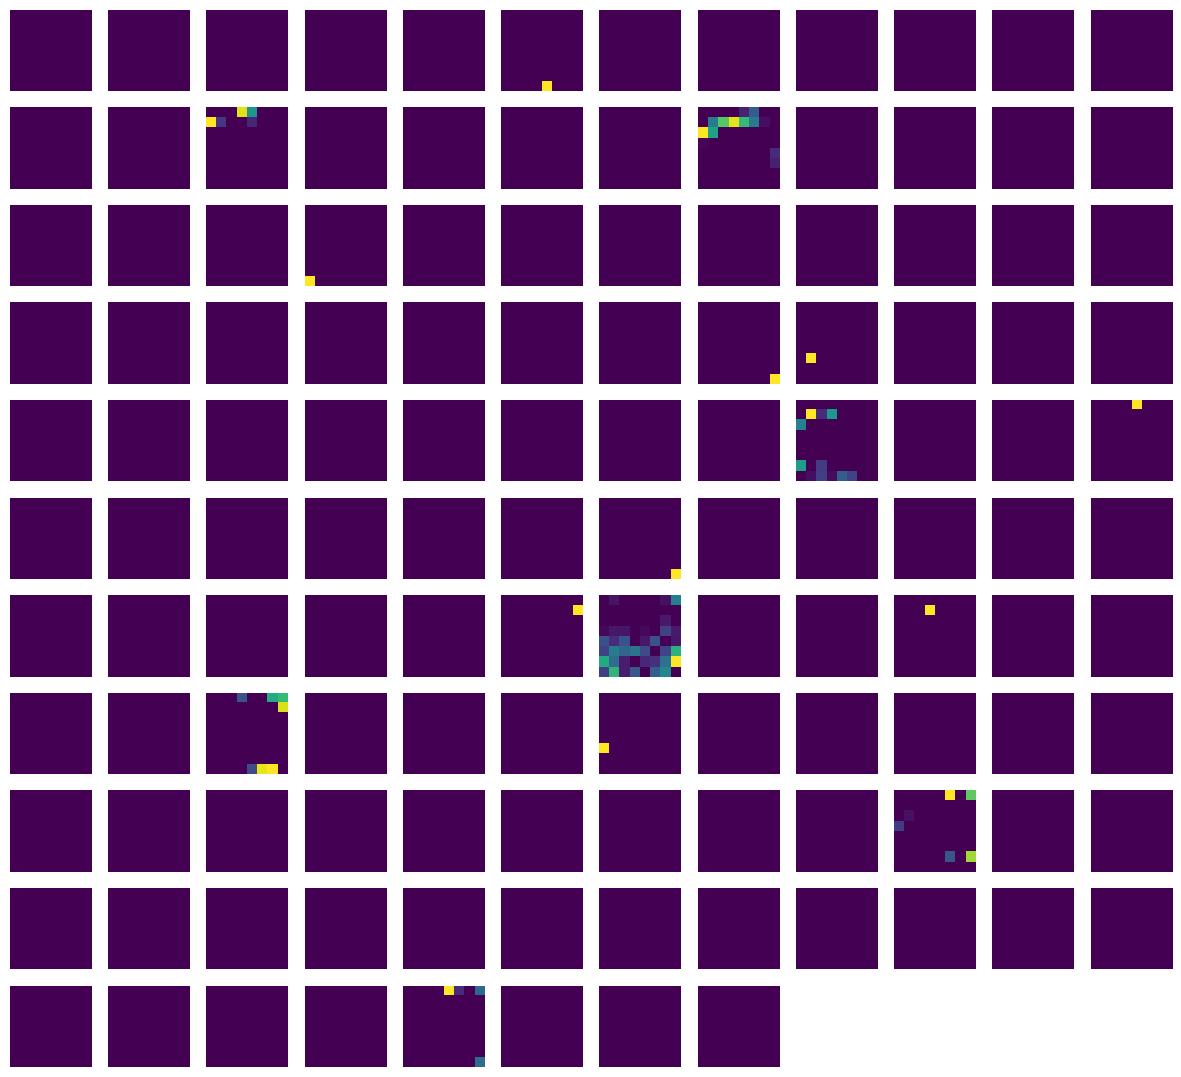

In [26]:
from tensorflow.keras.models import Model

# Call predict on the model
_ = model.predict(train_dataset.take(1))

# Try accessing the input layer directly
input_layer = model.layers[0].input
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=input_layer, outputs=layer_outputs) # Now Model is defined

# Visualize feature maps
def visualize_feature_maps(layer_index, image_index):
    activations = activation_model.predict(test_image.reshape(1, 100, 100, 3)) # Reshape to (1, 100, 100, 3) for Fruits 360
    activation = activations[layer_index]
    feature_map_count = activation.shape[-1]

    # Calculate grid dimensions dynamically
    grid_size = int(np.ceil(np.sqrt(feature_map_count)))

    plt.figure(figsize=(15, 15))
    for i in range(feature_map_count):
        plt.subplot(grid_size, grid_size, i+1) # Dynamic grid
        plt.imshow(activation[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.show()

# Example: Visualize feature maps for the first convolutional layer of the first image
for layer in range(len(layer_outputs)):
    print(f"Visualizing layer {layer + 1}")
    visualize_feature_maps(layer, 0) # You can still use image index 0

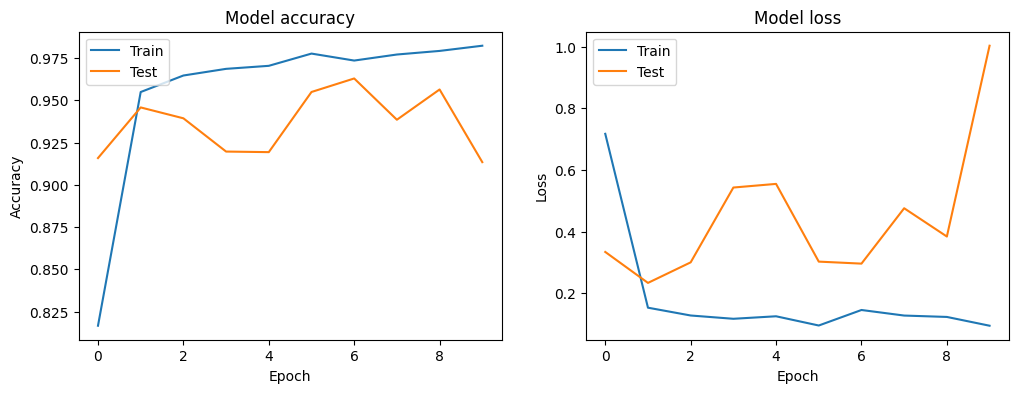

In [27]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()
